In this notebook we use pretrained tempogram model (from music_mood_classifier_tempogram.ipynb notebook) and train the MELS Spectrogram

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
from pathlib import Path



## TEMPOGRAM pretrained load

In [10]:
from  fastai.vision import models

melspectrogram_path = Path('/home/ec2-user/SageMaker/course-v3/nbs/personal_projects/Music_Mood_Classification/MelSpectrogram/')
label_path  = Path('/home/ec2-user/SageMaker/course-v3/nbs/personal_projects/Music_Mood_Classification/input_label.csv')


data = ImageDataBunch.from_csv(melspectrogram_path.parent,
                               melspectrogram_path.name, 
                               csv_labels = str(label_path), suffix='.png',size=224)

learnT = create_cnn(data, models.resnet50, metrics=[error_rate, accuracy])

In [16]:
learn_pretrined_tempo = learnT.load('R50_tempogram')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


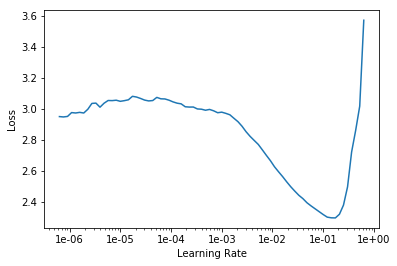

In [19]:
learn_pretrined_tempo.lr_find()
learn_pretrined_tempo.recorder.plot()

In [20]:
learn_pretrined_tempo.fit_one_cycle(25, 5e-2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.247840,1.041368,0.434204,0.565796
2,1.041149,0.971129,0.411040,0.588960
3,1.001668,21.906092,0.491868,0.508132
4,1.008548,0.991467,0.398719,0.601281
5,1.082908,1.110599,0.467718,0.532282
6,1.071149,2.908380,0.498768,0.501232
7,1.074003,1.310436,0.488911,0.511089
8,1.090982,101.987312,0.564317,0.435683
9,1.078859,1.492652,0.512568,0.487432
10,1.065941,1.354059,0.494332,0.505668


In [21]:
learn_pretrined_tempo.fit_one_cycle(25, 9e-2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.542630,2.148201,0.388862,0.611138
2,0.651301,2.990904,0.377033,0.622967
3,0.823158,1.005775,0.375554,0.624446
4,0.949069,0.967914,0.385412,0.614588
5,1.126756,1.507142,0.483982,0.516018
6,1.196784,1.930117,0.586496,0.413504
7,1.359439,6.503298,0.643667,0.356333
8,1.275597,1.199872,0.431247,0.568753
9,1.255711,2.900219,0.560375,0.439625
10,1.254166,1.448520,0.534253,0.465747


In [22]:
learn_pretrined_tempo.fit_one_cycle(25, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.639199,0.932492,0.361262,0.638738
2,0.624363,1.217173,0.363233,0.636767
3,0.634283,1.253317,0.360276,0.639724
4,0.621125,1.183725,0.369147,0.630853
5,0.617683,4.335072,0.366683,0.633317
6,0.624598,2.039011,0.363726,0.636274
7,0.613445,1.346772,0.373583,0.626417
8,0.611250,0.964485,0.362740,0.637260
9,0.601949,1.801931,0.363233,0.636767
10,0.598496,1.158446,0.369147,0.630853


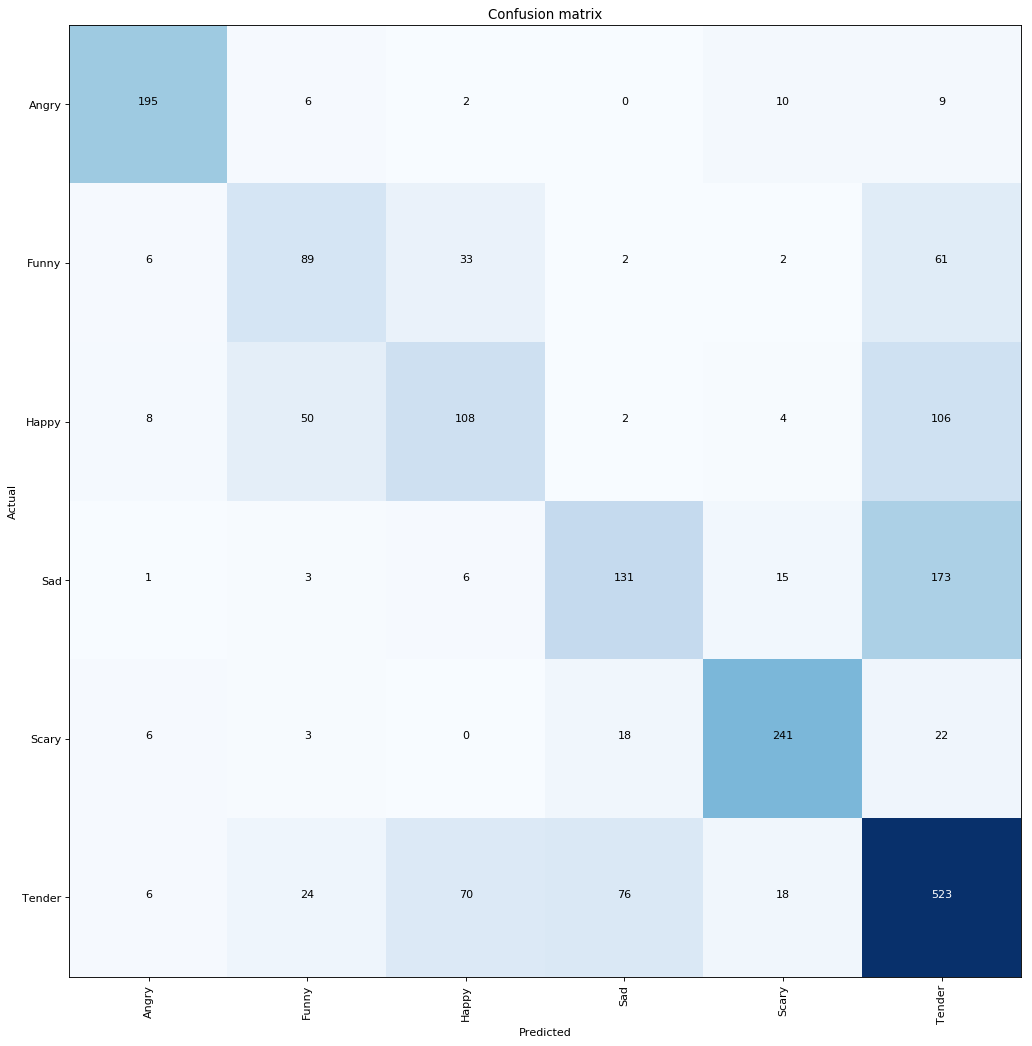

In [24]:
interp = ClassificationInterpretation.from_learner(learn_pretrined_tempo)
interp.plot_confusion_matrix(figsize=(13,13), dpi=80)

In [ ]:
####Notes

learn_pretrined_tempo.fit_one_cycle(25, 5e-2) Acc - 63.3
learn_pretrined_tempo.fit_one_cycle(25, 9e-2) - 64.4
learn_pretrined_tempo.fit_one_cycle(25, 1e-3) Acc - 63.72